# Identifying the health of fetal using Cardiotocography (CTG)




In [ ]:
# Importing the packages to be used
import numpy as np
import pandas as pd

# Packages for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Other Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [ ]:
# Loading the data that has been uploaded into colab
fetal_h = pd.read_csv("/content/fetal_health.csv")
# View the first 10 rows (excluding the headers)
fetal_h.head(11)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
#  printing to view all our dataset columns
cols = fetal_h.columns
print(cols)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [ ]:
# Using DataFrame.info() method to print the summary of the DataFrame including the index dtype and columns, non-null values and memory usage.
fetal_h.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Using the pandas describe function to generate the descriptive statistics on the dataframe
# Using transpose to change the axes of the data
fetal_h.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
# Check for the dimension of the dataframe
print(f"The size of the dataset: {fetal_h.shape}")

The size of the dataset: (2126, 22)


In [ ]:
# Checking the dataframe for some null values
print(f"Number of missing values:\n{fetal_h.isnull().sum().sum()}")

Number of missing values:
0


*         For this data set there are no missing or null values


## Data Visualisation 

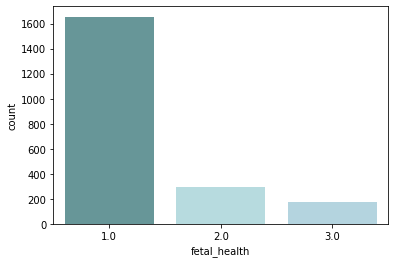

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#5F9EA0", "#B0E0E6", "#ADD8E6"]
sns.countplot(data= fetal_h, x="fetal_health",palette=colours)

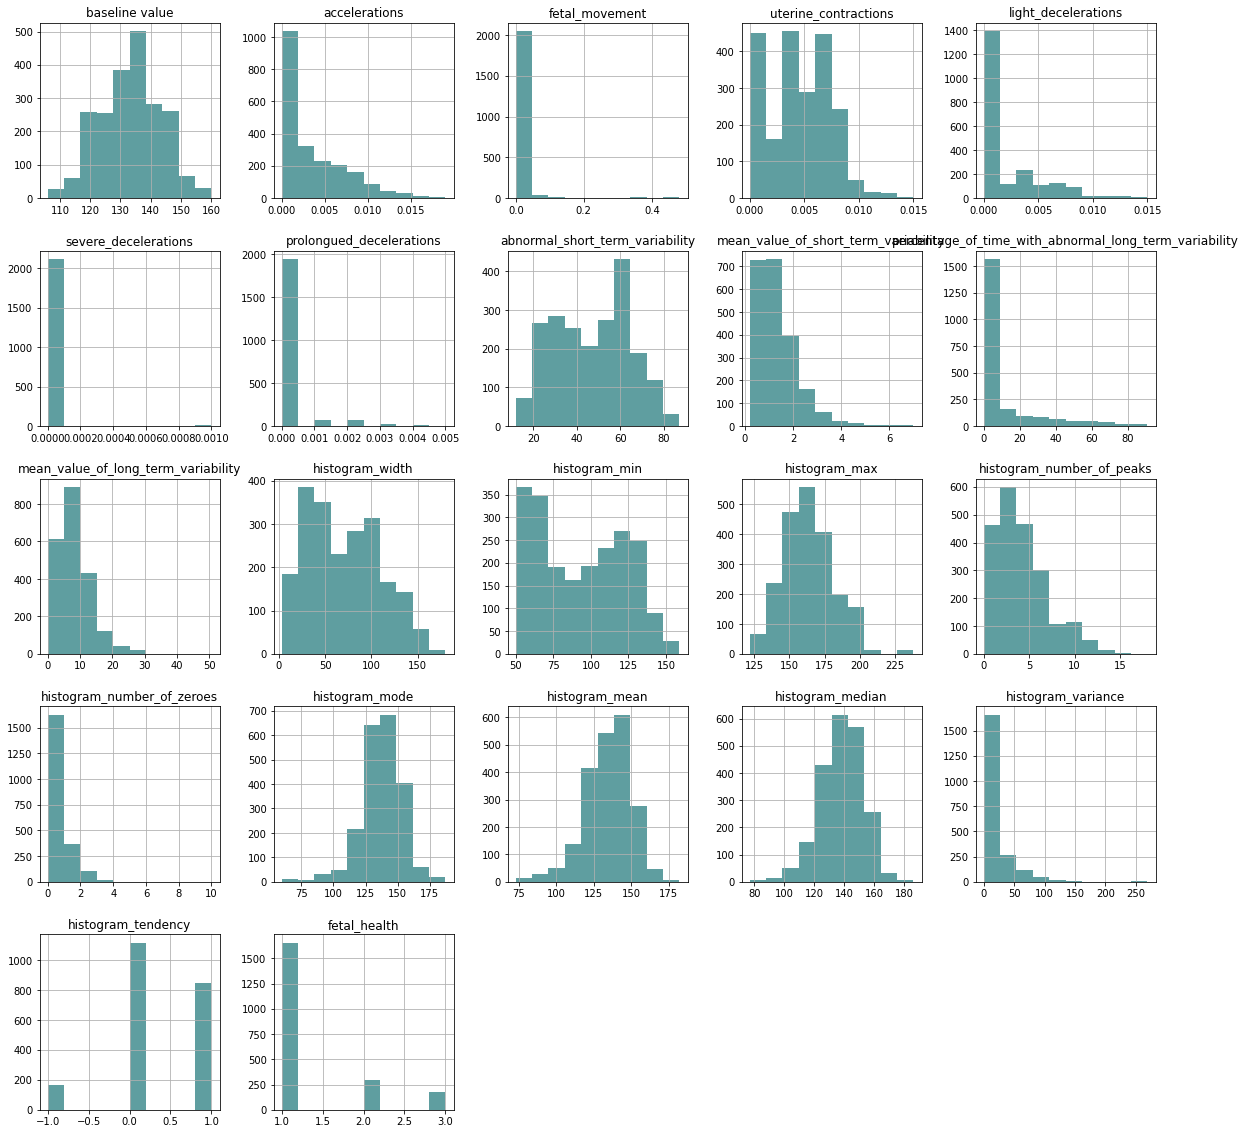

In [ ]:
hist_plot = fetal_h.hist(figsize = (20,20), color = "#5F9EA0")

# Normalization of data. 

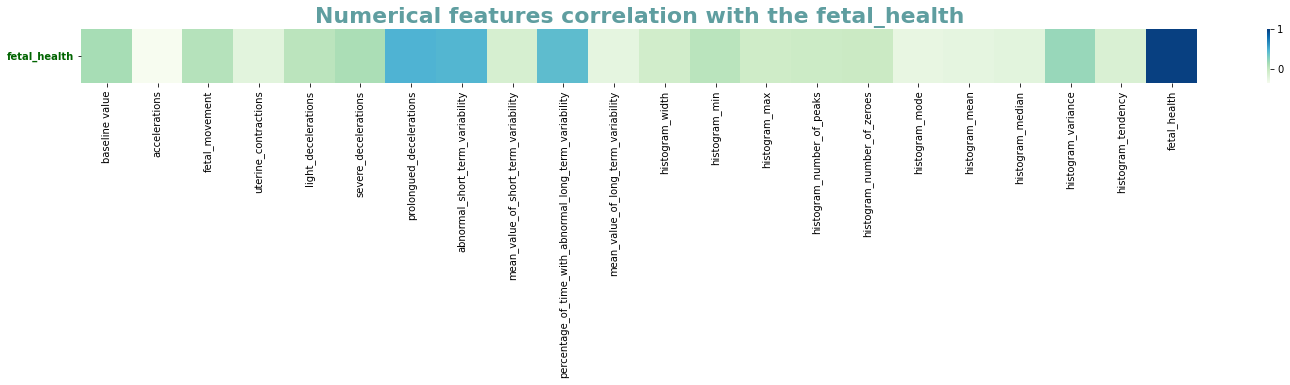

In [ ]:
numeric_data = fetal_h.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=22, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [ ]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


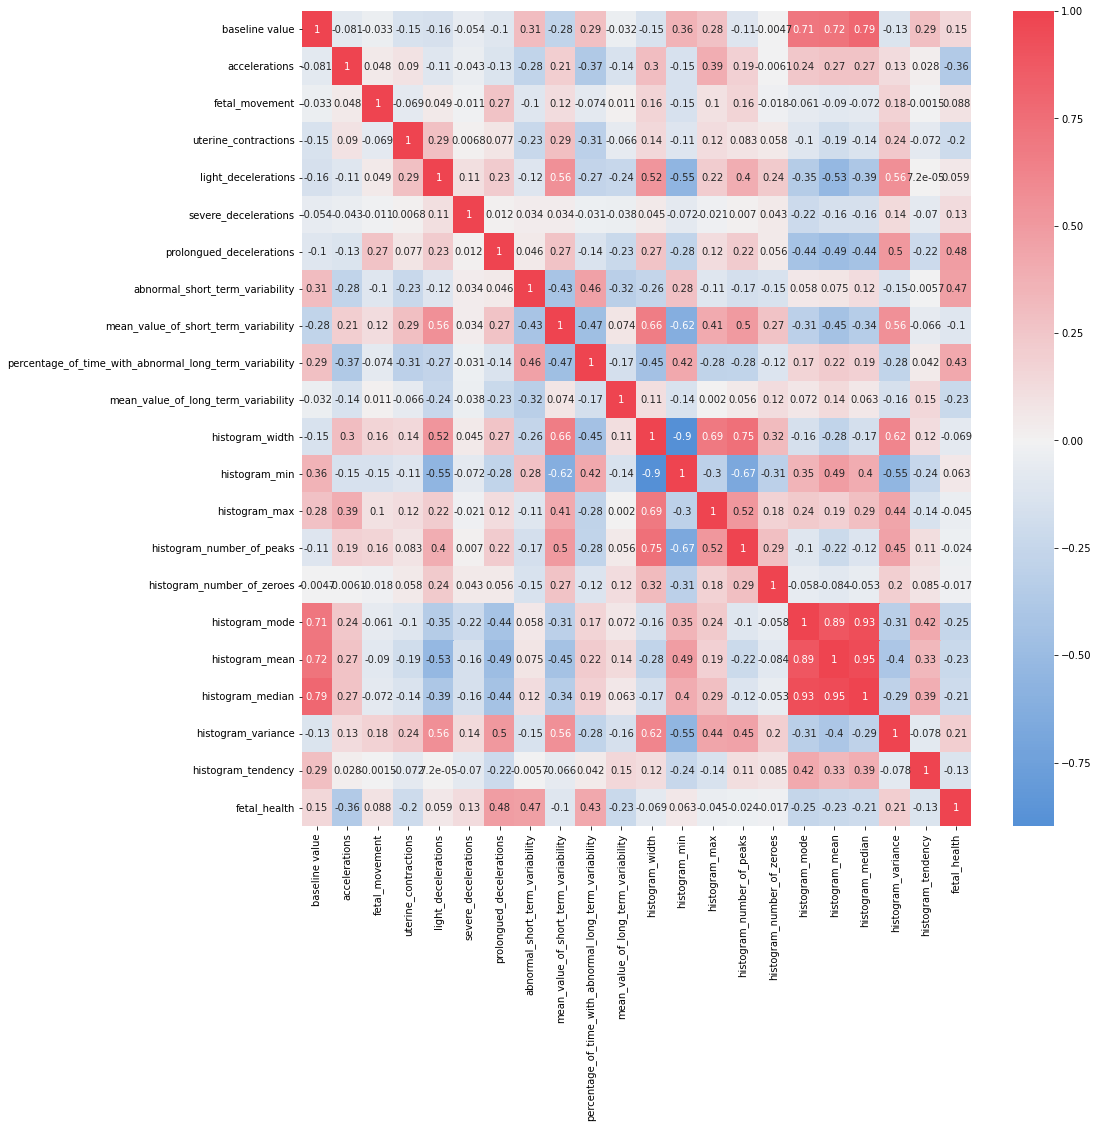

In [ ]:
#correlation matrix
corrmat= fetal_h.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
# Here we will normalise the data in a range of 0 to 1 and exclude the output column "fetal health" in this step.
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(fetal_h.drop(["fetal_health"],axis = 1),), columns = columns)
Y = fetal_h["fetal_health"]
X.head(11)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
5,0.070757,-0.563635,-0.20321,1.912687,2.402604,-0.057476,3.122175,-1.221153,5.172188,-0.535361,...,2.042649,-1.474609,2.005277,0.316003,3.791490,-3.752237,-1.771050,-2.149617,5.218765,-0.524526
6,0.070757,-0.563635,-0.20321,2.931233,2.064711,-0.057476,4.817640,-1.046621,5.625172,-0.535361,...,2.042649,-1.474609,2.005277,0.655137,3.791490,-4.057535,-1.771050,-2.218758,6.772052,-0.524526
7,-1.148938,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.209142,...,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
8,-1.148938,-0.822388,-0.20321,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.263512,...,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
9,-1.148938,-0.822388,-0.20321,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.209142,...,-0.062802,-1.068562,-1.896626,-1.040530,-0.458444,-0.943495,-0.808890,-1.043360,-0.614691,1.112980


In [ ]:
# Here we split the data 60%, 20%, 20% split for training, validation and test sets
X_train, X_validate, X_test = np.split(X.sample(frac=1), [int(.6*len(X)), int(.8*len(X))])
print(X_train.shape, X_validate.shape, X_test.shape)

(1275, 21) (425, 21) (426, 21)


In [ ]:
# Here we split the data 60%, 20%, 20% split for training, validation and test sets
Y_train, Y_validate, Y_test = np.split(Y.sample(frac=1), [int(.6*len(Y)), int(.8*len(Y))])
print(Y_train.shape, Y_validate.shape, Y_test.shape)

(1275,) (425,) (426,)


In [ ]:
#A quick model selection process
#pipelines of models(to fit and pred)
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC(kernel='rbf'))]) # kernel to be set radial bf 

# List of all the pipelines
pipelines = [pipeline_knn, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'KNN', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,Y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

KNN: 0.745091 
Decision Tree: 0.612580 
RandomForest: 0.753740 
SVC: 0.774120 


Based on this training model, SVC has the best performance with the training data

##**Looking at the KNN model**


Using the training Dataset

In [ ]:
#using Decision tree to check how it performs on the Training dataset
knn_predictions_train = pipeline_knn.predict(X_train)
accuracy_knn_train = accuracy_score(Y_train,knn_predictions_train)
accuracy_knn_train

0.7756862745098039

In [ ]:
print("Classification Result for KNN on the Training dataset")
print(classification_report(Y_train, knn_predictions_train))

Classification Result for KNN on the Training dataset
              precision    recall  f1-score   support

         1.0       0.79      0.98      0.87       987
         2.0       0.45      0.09      0.16       180
         3.0       0.80      0.04      0.07       108

    accuracy                           0.78      1275
   macro avg       0.68      0.37      0.37      1275
weighted avg       0.74      0.78      0.70      1275



Using the validate dataset

In [ ]:
#using Decision tree to check how it performs on the validate dataset
knn_predictions_v = pipeline_knn.predict(X_validate)
accuracy_knn_val = accuracy_score(Y_validate,knn_predictions_v)
accuracy_knn_val

0.7623529411764706

In [ ]:
print("Classification Result for KNN on the Validate dataset")
print(classification_report(Y_validate, knn_predictions_v))

Classification Result for KNN on the Validate dataset
              precision    recall  f1-score   support

         1.0       0.80      0.95      0.87       340
         2.0       0.00      0.00      0.00        52
         3.0       0.00      0.00      0.00        33

    accuracy                           0.76       425
   macro avg       0.27      0.32      0.29       425
weighted avg       0.64      0.76      0.69       425



In [ ]:
#confusion matrix using the validation dataset
print("Confusion Matrix on Validate data set using KNN:")
print(confusion_matrix(Y_validate, knn_predictions_v))

Confusion Matrix on Validate data set using KNN:
[[324   8   8]
 [ 52   0   0]
 [ 31   2   0]]


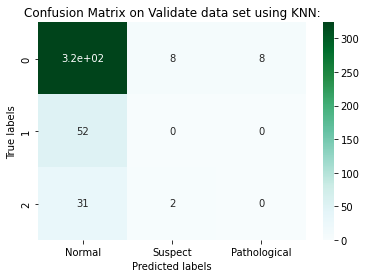

In [ ]:
#heatmap for the validate dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_validate, knn_predictions_v), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix on Validate data set using KNN"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Using the test dataset

In [ ]:
#using KNN to check how it performs on the test dataset
knn_predictions_t = pipeline_knn.predict(X_test)
accuracy_knn_tst = accuracy_score(Y_test,knn_predictions_t)
accuracy_knn_tst

0.7253521126760564

In [ ]:
print("Classification Result for KNN on the test dataset")
print(classification_report(Y_test, knn_predictions_t))

Classification Result for KNN on the test dataset
              precision    recall  f1-score   support

         1.0       0.77      0.93      0.84       328
         2.0       0.13      0.05      0.07        63
         3.0       0.00      0.00      0.00        35

    accuracy                           0.73       426
   macro avg       0.30      0.33      0.30       426
weighted avg       0.61      0.73      0.66       426



In [ ]:
#confusion matrix using the test dataset
print("Confusion Matrix on test data using KNN:")
print(confusion_matrix(Y_test, knn_predictions_t))

Confusion Matrix on test data using KNN:
[[306  19   3]
 [ 60   3   0]
 [ 34   1   0]]


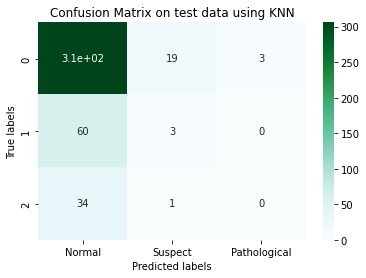

In [ ]:
#heatmap for the test dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, knn_predictions_t), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix on test data using KNN"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##**Looking at the Random Forest model**


Using the Training Dataset

In [ ]:
#using Random Forest to check how it performs on the train dataset
rf_predictions_train = pipeline_rf.predict(X_train)
accuracy_rf_train = accuracy_score(Y_train,rf_predictions_train)
accuracy_rf_train

1.0

In [ ]:
print("Classification Report for Random Forest on the Train dataset")
print(classification_report(Y_train, rf_predictions_train))

Classification Report for Random Forest on the Train dataset
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       987
         2.0       1.00      1.00      1.00       180
         3.0       1.00      1.00      1.00       108

    accuracy                           1.00      1275
   macro avg       1.00      1.00      1.00      1275
weighted avg       1.00      1.00      1.00      1275



Using the validate dataset

In [ ]:
#using Decision tree to check how it performs on the validate dataset
rf_predictions_v = pipeline_rf.predict(X_validate)
accuracy_rf_val = accuracy_score(Y_validate,rf_predictions_v)
accuracy_rf_val

0.7835294117647059

In [ ]:
print("Classification Report for Random Forest on the Validate dataset")
print(classification_report(Y_validate, rf_predictions_v))

Classification Report for Random Forest on the Validate dataset
              precision    recall  f1-score   support

         1.0       0.80      0.97      0.88       340
         2.0       0.12      0.02      0.03        52
         3.0       0.25      0.03      0.05        33

    accuracy                           0.78       425
   macro avg       0.39      0.34      0.32       425
weighted avg       0.68      0.78      0.71       425



In [ ]:
#confusion matrix using the validation dataset
print("Confusion Matrix on Validate data set using Random forest:")
print(confusion_matrix(Y_validate, rf_predictions_v))

Confusion Matrix on Validate data set using Random forest:
[[331   6   3]
 [ 51   1   0]
 [ 31   1   1]]


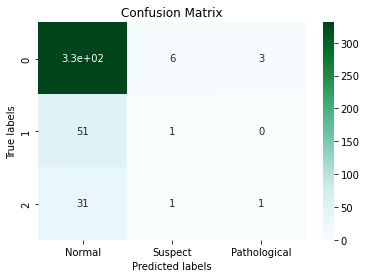

In [ ]:
#heatmap for the validate dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_validate, rf_predictions_v), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Using the test dataset

In [ ]:
#using Random forest to check how it performs on the test dataset
rf_predictions_t = pipeline_rf.predict(X_test)
accuracy_rf_test = accuracy_score(Y_test,rf_predictions_t)
accuracy_rf_test

0.7535211267605634

In [ ]:
print("Classification Report for Random Forest on the Test dataset")
print(classification_report(Y_test, rf_predictions_t))

Classification Report for Random Forest on the Test dataset
              precision    recall  f1-score   support

         1.0       0.77      0.98      0.86       328
         2.0       0.17      0.02      0.03        63
         3.0       0.00      0.00      0.00        35

    accuracy                           0.75       426
   macro avg       0.31      0.33      0.30       426
weighted avg       0.62      0.75      0.67       426



In [ ]:
#confusion matrix using the test dataset
print("Confusion Matrix on Test data set using Random forest:")
print(confusion_matrix(Y_test, rf_predictions_t))

Confusion Matrix on Test data set using Random forest:
[[320   5   3]
 [ 62   1   0]
 [ 35   0   0]]


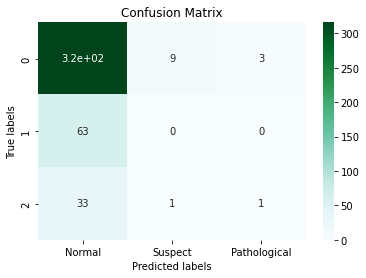

In [ ]:
#heatmap for the test dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, rf_predictions_t), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##**Model Performance Analysis on SVM**

We proceed to do classification report which includes Precision, Recall and F1-Score on the top model and least model, in this case SVM and decision tree.

Using the training dataset

In [ ]:
#using SVC to check how it performs on the Training dataset
svc_predictions_train=pipeline_svc.predict(X_train)
acccuracy_svmtrain= accuracy_score(Y_train,svc_predictions_train)
acccuracy_svmtrain

0.7741176470588236

In [ ]:
print("Classification Report for SVC on the Training dataset")
print(classification_report(Y_train, svc_predictions_train))

Classification Report for SVC on the Training dataset
              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87       987
         2.0       0.00      0.00      0.00       180
         3.0       0.00      0.00      0.00       108

    accuracy                           0.77      1275
   macro avg       0.26      0.33      0.29      1275
weighted avg       0.60      0.77      0.68      1275



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using the validate dataset**

In [ ]:
#using SVC to check how it performs on the validate dataset
svc_predictions_v=pipeline_svc.predict(X_validate)
acccuracy_svmval= accuracy_score(Y_validate,svc_predictions_v)
acccuracy_svmval

0.8

In [ ]:
print("Classification Report for SVC on the validate dataset")
print(classification_report(Y_validate, svc_predictions_v))

Classification Report for SVC on the validate dataset
              precision    recall  f1-score   support

         1.0       0.80      1.00      0.89       340
         2.0       0.00      0.00      0.00        52
         3.0       0.00      0.00      0.00        33

    accuracy                           0.80       425
   macro avg       0.27      0.33      0.30       425
weighted avg       0.64      0.80      0.71       425



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#confusion matrix using the validation dataset
print("Confusion Matrix:")
print(confusion_matrix(Y_validate, svc_predictions_v,))

Confusion Matrix:
[[340   0   0]
 [ 52   0   0]
 [ 33   0   0]]


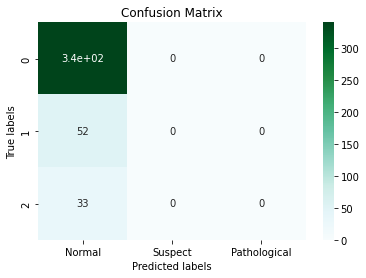

In [ ]:
#heatmap for the validate dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_validate, svc_predictions_v), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

**Using the test dataset**

In [ ]:
#using SVC to check how it performs on the test dataset
svc_predictions_t=pipeline_svc.predict(X_test)
acccuracy_svmtest= accuracy_score(Y_test,svc_predictions_t)
acccuracy_svmtest

0.7699530516431925

In [ ]:
print("Classification Report for SVC on the test dataset")
print(classification_report(Y_test, svc_predictions_t))

Classification Report for SVC on the test dataset
              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87       328
         2.0       0.00      0.00      0.00        63
         3.0       0.00      0.00      0.00        35

    accuracy                           0.77       426
   macro avg       0.26      0.33      0.29       426
weighted avg       0.59      0.77      0.67       426



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#confusion matrix using the test dataset
print("Confusion Matrix:")
print(confusion_matrix(Y_test, svc_predictions_t))


Confusion Matrix:
[[328   0   0]
 [ 63   0   0]
 [ 35   0   0]]


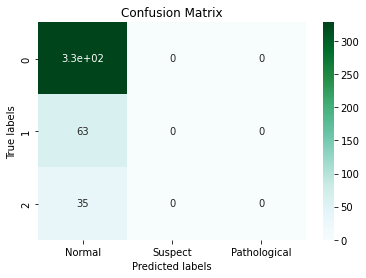

In [ ]:
#heatmap for the test dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, svc_predictions_t), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##**Now we proceed to look at Decision tree model**


Using the training dataset

In [ ]:
#using Decision tree to check how it performs on the train dataset
dt_predictions_train = pipeline_dt.predict(X_train)
accuracy_dt_train = accuracy_score(Y_train,dt_predictions_train)
accuracy_dt_train

1.0

In [ ]:
print("Classification Report for Decision Tree on the Train dataset")
print(classification_report(Y_train, dt_predictions_train))

Classification Report for Decision Tree on the Train dataset
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       987
         2.0       1.00      1.00      1.00       180
         3.0       1.00      1.00      1.00       108

    accuracy                           1.00      1275
   macro avg       1.00      1.00      1.00      1275
weighted avg       1.00      1.00      1.00      1275



Using the validate dataset

In [ ]:
#using Decision tree to check how it performs on the validate dataset
dt_predictions_v = pipeline_dt.predict(X_validate)
accuracy_dt_val = accuracy_score(Y_validate,dt_predictions_v)
accuracy_dt_val

0.5976470588235294

In [ ]:
print("Classification Report for Decision Tree on the Validate dataset")
print(classification_report(Y_validate, dt_predictions_v))

Classification Report for Decision Tree on the Validate dataset
              precision    recall  f1-score   support

         1.0       0.80      0.71      0.75       340
         2.0       0.11      0.15      0.13        52
         3.0       0.10      0.15      0.12        33

    accuracy                           0.60       425
   macro avg       0.34      0.34      0.33       425
weighted avg       0.66      0.60      0.63       425



In [ ]:
#confusion matrix using the validation dataset
print("Confusion Matrix:")
print(confusion_matrix(Y_validate, dt_predictions_v))

Confusion Matrix:
[[241  60  39]
 [ 39   8   5]
 [ 22   6   5]]


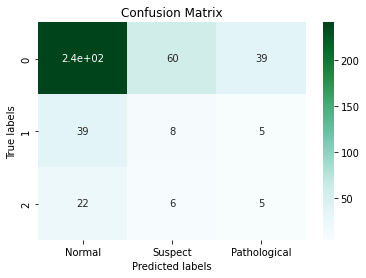

In [ ]:
#heatmap for the validate dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_validate, dt_predictions_v), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Using the test dataset

In [ ]:
#using Decision tree to check how it performs on the test dataset
dt_predictions_t = pipeline_dt.predict(X_test)
accuracy_dt_tst = accuracy_score(Y_test,dt_predictions_t)
accuracy_dt_tst

0.5657276995305164

In [ ]:
print("Classification Report for Decision Tree on the Validate dataset")
print(classification_report(Y_test, dt_predictions_t))

Classification Report for Decision Tree on the Validate dataset
              precision    recall  f1-score   support

         1.0       0.75      0.70      0.73       328
         2.0       0.11      0.13      0.12        63
         3.0       0.05      0.06      0.05        35

    accuracy                           0.57       426
   macro avg       0.30      0.30      0.30       426
weighted avg       0.60      0.57      0.58       426



In [ ]:
#confusion matrix using the test dataset
print("Confusion Matrix:")
print(confusion_matrix(Y_test, dt_predictions_t))

Confusion Matrix:
[[231  59  38]
 [ 51   8   4]
 [ 26   7   2]]


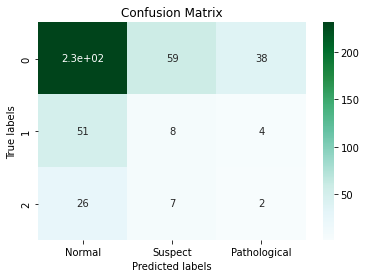

In [ ]:
#heatmap for the test dataset
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, dt_predictions_t), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);